# E-Commerce: Identificar os perfis dos consumidores

## Entendendo os dados

In [ ]:
# Importanto bibliotecas para análises iniciais do dataframe.

import pandas as pd
import matplotlib as plot
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Ellipse

In [ ]:
# Definir a paleta de cores personalizada da everthing plus
colors = ['#025159', '#012326', '#16DCF2', '#1497A6', '#F2F2F2']
sns.set_palette(sns.color_palette(colors))

In [ ]:
# Lendo o df com a biblioteca Pandas
df=pd.read_csv('C:/Users/gabri/Proj_final/ecommerce_dataset_us.csv', sep='	')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


### **Descrição dos dados**

O conjunto de dados contém o histórico de transações da Everything Plus, uma loja online que vende utensílios domésticos.

O arquivo `ecommerce_dataset_us.csv` contém as seguintes colunas:

`InvoiceNo`: Identificador de pedido.

`StockCode`: Identificador de item.

`Description`: Nome de item.

`Quantity`: Quantidade de itens.

`InvoiceDate`: Data do pedido.

`UnitPrice`: Preço por item.

`CustomerID`: ID do cliente.

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Limpando os dados 

### Olhadinha nos dados
É perceptível que existem valores duplicados, nulos (no id do cliente) , negativos e absurdamente altos que vão interferir na análise, vamos analisá-los e tratá-los.

In [ ]:
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

Como utilizamos dados de compras com item comprado, horário, id do cliente, etc. É bem provável que as linhas duplicadas sejam um erro de registro no sistema, para não nos atrapalhar, vamos descartá-los!

In [ ]:
df=df.drop_duplicates()

In [ ]:
df[df['CustomerID'].isna()].head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,11/29/2018 11:52,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,11/29/2018 14:32,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,11/29/2018 14:32,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,11/29/2018 14:32,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,11/29/2018 14:32,1.66,NaN
1447,536544,21790,VINTAGE SNAP CARDS,9,11/29/2018 14:32,1.66,NaN
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,11/29/2018 14:32,2.51,NaN
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,11/29/2018 14:32,0.43,NaN
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,11/29/2018 14:32,0.43,NaN
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,11/29/2018 14:32,0.43,NaN


In [ ]:
df[df['CustomerID'].isna()]['InvoiceNo'].value_counts()

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
551461       1
551506       1
551538       1
551553       1
556122       1
Name: InvoiceNo, Length: 3710, dtype: int64

Não é possível chegar em nenhuma conclusão sobre os dados nulos do ID do cliente. 

In [ ]:
df.corr()

C:\Users\gabri\AppData\Local\Temp\ipykernel_10532\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001241,-0.003457
UnitPrice,-0.001241,1.000000,-0.004524
CustomerID,-0.003457,-0.004524,1.000000


Dando uma primeira olhada nas correlações dos dados antes da limpeza.

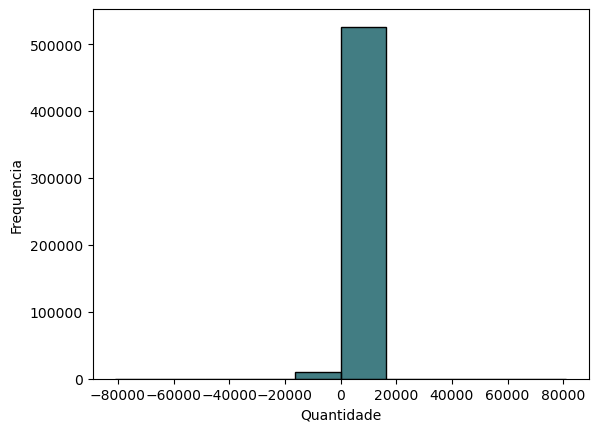

In [ ]:
# Histograma da quantidade de itens comprados
sns.histplot(data=df['Quantity'], bins=10)
plt.xlabel('Quantidade')
plt.ylabel('Frequencia')
plt.savefig('histograma_antes.png')
plt.show()


In [ ]:
# Apagando quantidades de compra menores do que 0.
df.drop(df[df['Quantity']<=0].index, inplace=True)

In [ ]:
# Apagando preço menores do que 0.
df.drop(df[df['UnitPrice']<=0].index, inplace=True)

In [ ]:
# Descobrindo os percentis:
print(np.percentile(df['Quantity'], [0, 50, 99]))


[  1.   4. 100.]


In [ ]:
# Apagando quantidades de compra menores do que 0.
df.drop(df[df['Quantity']>100].index, inplace=True)

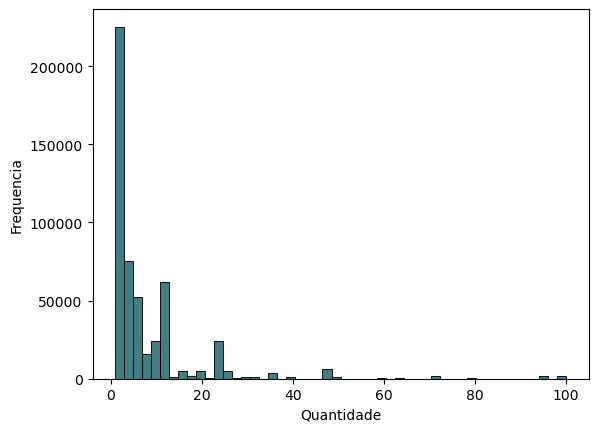

In [ ]:
# Histograma da quantidade de itens comprados
sns.histplot(data=df['Quantity'], bins=50)
plt.xlabel('Quantidade')
plt.ylabel('Frequencia')
plt.savefig('histograma_depois.png')
plt.show()


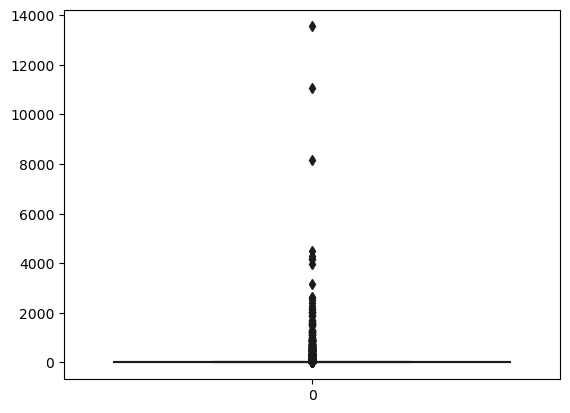

In [ ]:
# Boxplot do preço unitário dos itens
sns.boxplot(data=df['UnitPrice'])
plt.savefig('boxplot_antes.png')
plt.show()


In [ ]:
# Apagando quantidades de compra menores do que 0.
df.drop(df[df['UnitPrice']<=0].index, inplace=True)

In [ ]:
# Descobrindo os percentis:
print(np.percentile(df['UnitPrice'], [0, 50, 99]))


[1.000e-03 2.100e+00 1.698e+01]


In [ ]:
# Apagando quantidades de compra menores do que 0.
df.drop(df[df['UnitPrice']>3000].index, inplace=True)

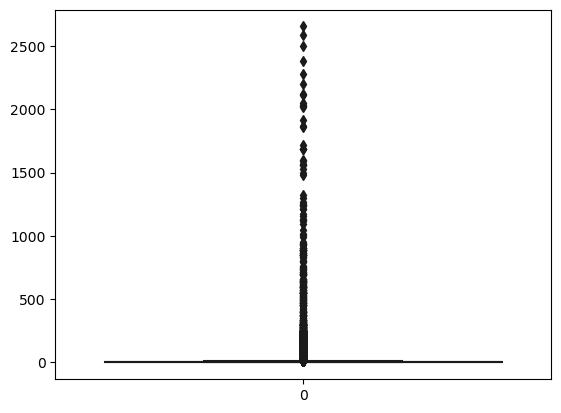

In [ ]:
# Boxplot do preço unitário dos itens
sns.boxplot(data=df['UnitPrice'])
plt.savefig('boxplot_depois.png')
plt.show()


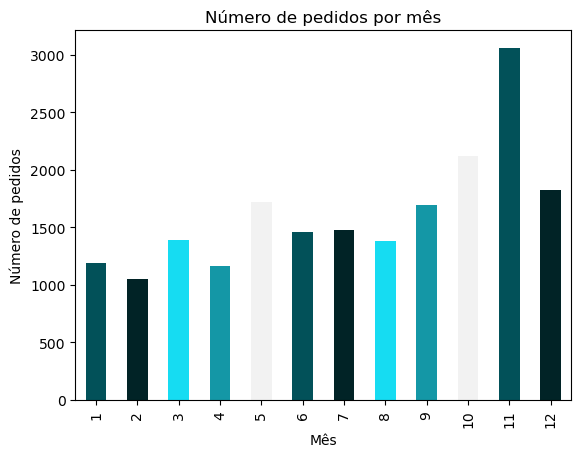

In [ ]:
# Barras do número de quantidade de itens comprados por tempo
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Month']=df['InvoiceDate'].dt.month

#Contando número de pedidos por mês:
monthly_sales=df.groupby('Month')['InvoiceNo'].nunique()
cores = ['#025159', '#012326', '#16DCF2', '#1497A6', '#F2F2F2']

# criar o gráfico de barras
monthly_sales.plot(kind='bar', color=cores)
plt.title('Número de pedidos por mês')
plt.xlabel('Mês')
plt.ylabel('Número de pedidos')
plt.show()

<Axes: xlabel='UnitPrice', ylabel='Quantity'>

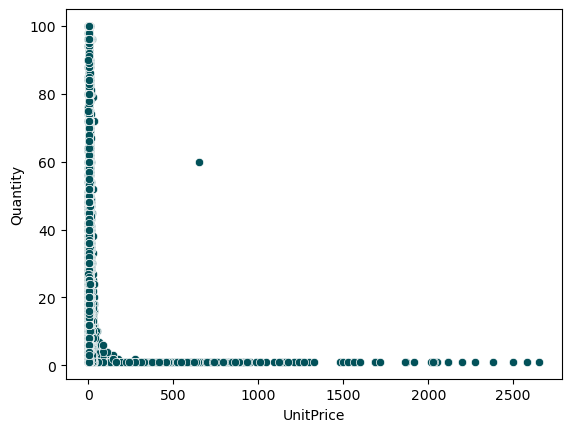

In [ ]:
sns.scatterplot(data=df, x='UnitPrice', y='Quantity')

#### Enriquecendo com coluna de valor total da compra.

In [ ]:
df['TotalValue']=df['UnitPrice']*df['Quantity']

<Axes: xlabel='CustomerID', ylabel='TotalValue'>

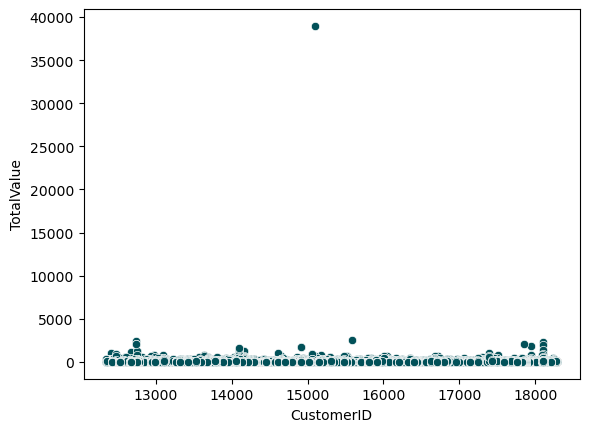

In [ ]:
sns.scatterplot(data=df, x='CustomerID', y='TotalValue')

In [ ]:
# Apagando a linha onde o valor total da compra foi aprox 40000.
df.drop(df[df['TotalValue']>35000].index, inplace=True)

<Axes: xlabel='CustomerID', ylabel='TotalValue'>

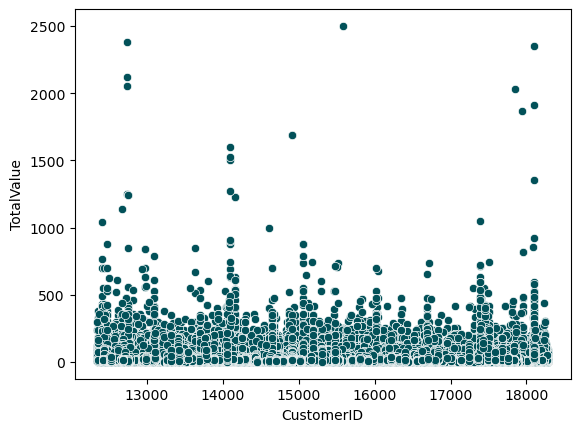

In [ ]:
sns.scatterplot(data=df, x='CustomerID', y='TotalValue')

## Análise de Correlação com dados limpos

C:\Users\gabri\AppData\Local\Temp\ipykernel_10532\3526272234.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=sns.cm.rocket_r)


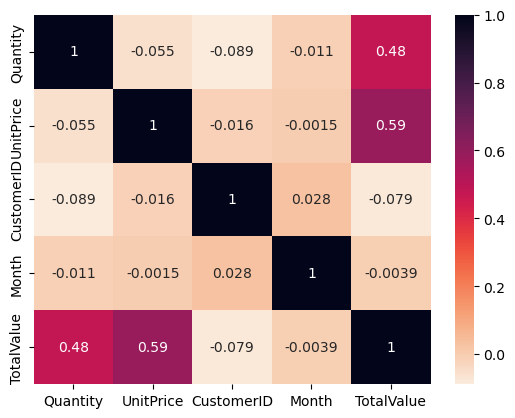

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap=sns.cm.rocket_r)
plt.show()
# Observando correlação dos dados enriquecidos e tratados

Em conclusão, pode-se observar que os dados analisados apresentam uma fraca correlação entre as colunas de quantidade e preço, bem como entre quantidade e mês, com coeficientes de correlação próximos a zero. No entanto, é importante destacar que a coluna "totalvalue", que foi adicionada como a soma do produto entre quantidade e preço, apresentou uma forte correlação com ambas as colunas originais, indicando uma relação mais significativa.

Apesar da fraca correlação entre os dados, não é um fator impeditivo para a criação de clusters. A análise de clusters é uma técnica estatística utilizada para agrupar dados similares com base em suas características, independentemente da correlação entre elas. Outros métodos, como a distância entre os pontos ou a similaridade de padrões, podem ser usados para identificar agrupamentos ou padrões nos dados, mesmo quando a correlação é baixa.

Portanto, embora a fraca correlação entre as colunas de quantidade, preço e mês possa indicar que essas variáveis não têm uma relação linear clara entre si, isso não impede a aplicação de técnicas de análise de clusters para identificar possíveis agrupamentos ou padrões nos dados. É importante considerar diferentes abordagens estatísticas e métodos de análise de dados para obter uma compreensão completa e detalhada dos padrões e insights presentes nos dados, independentemente da correlação entre as variáveis.

## Clusterização com base no tipo de compra

### Padronizando os dados
Importando ferramentas para aprendizado não supervisionado de máquina e estatística para validação do modelo de ML.

In [ ]:
from matplotlib.patches import Ellipse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans


### Implementando modelo de machine learning para dividir os tipos de compras em n números

In [ ]:
# Realizando padronização dos dados:
scaler = StandardScaler()
# Utilizando quantidade e preço para as colunas do modelo.
X_sc = scaler.fit_transform(df[['Quantity', 'UnitPrice']])
df_standard=pd.DataFrame()
df_standard['Quantity']=X_sc[:,0]
df_standard['UnitPrice']=X_sc[:,1]

In [ ]:
df_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520021 entries, 0 to 520020
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Quantity   520021 non-null  float64
 1   UnitPrice  520021 non-null  float64
dtypes: float64(2)
memory usage: 7.9 MB


In [ ]:
max_clusters = 10
kmeans = [KMeans(n_clusters=i) for i in range(1, max_clusters+1)]

Realizando método do cotovelo para visualizar o ponto de "cotovelo", onde o ganho de performance se torna menor para cada quantidade de clusters. 

In [ ]:

score = [kmeans[i].fit(df_standard).score(df_standard) for i in range(len(kmeans))]


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\clust

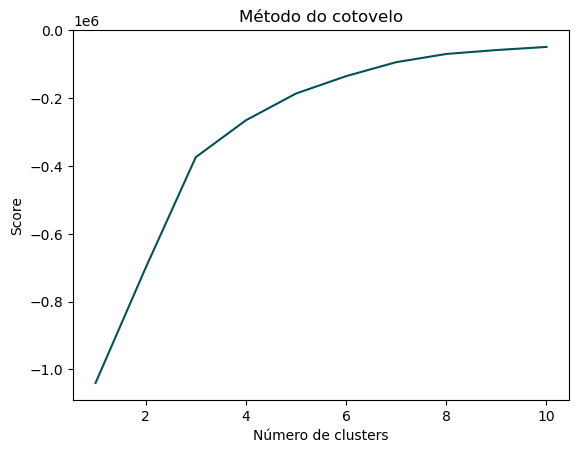

In [ ]:
plt.plot(range(1, max_clusters+1), score)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.show()

Dessa forma, você poderá utilizar o método do cotovelo para descobrir o número de clusters ideal para a sua análise. O ponto de "cotovelo" é o número de clusters a partir do qual o ganho de performance do modelo de clusterização se torna menor, indicando que o número de clusters ideal foi atingido, nesse caso 3.

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\clust

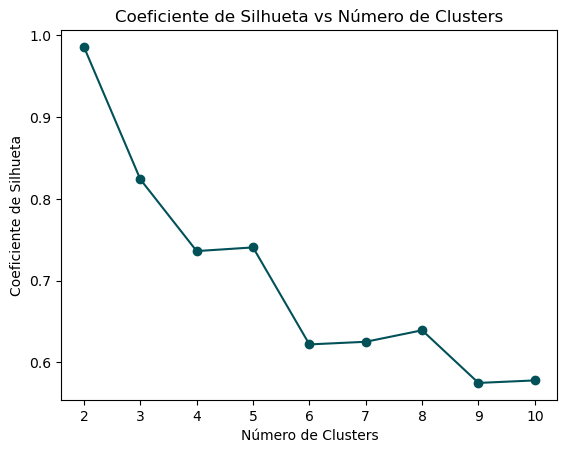

In [ ]:
# Loop para variar o número de clusters de 2 a 10
df_standard_sample=df_standard.sample(n=10000, replace=False)
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_standard_sample)
    # Obtendo os rótulos de cluster para cada ponto de dados
    labels = kmeans.labels_
    # Calculando o coeficiente de silhueta para os clusters atuais
    silhouette_avg = silhouette_score(df_standard_sample, labels)
    # Adicionando o coeficiente de silhueta à lista
    silhouette_scores.append(silhouette_avg)

# Plotando o gráfico de coeficiente de silhueta versus número de clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Coeficiente de Silhueta vs Número de Clusters')
plt.show()

O coeficiente de silhueta coincide parcialmente com nossa análise de cotovelo. Vamos dar uma olhada no resultado e caso os clusters não fiquem claros e funcionais repetimos com outra quantidade.

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
# Treinando o modelo
kmeans.fit(df_standard)


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
rotulos = kmeans.predict(df_standard)
# Salvando os grupos resultados para cada compra.

In [ ]:
df_standard['rotulos'] = rotulos

df_standard['rotulos'].value_counts()
 
# Observando tamanho dos grupos 

0    499177
1     20703
2       141
Name: rotulos, dtype: int64

## Observando tipos de compras graficamente:

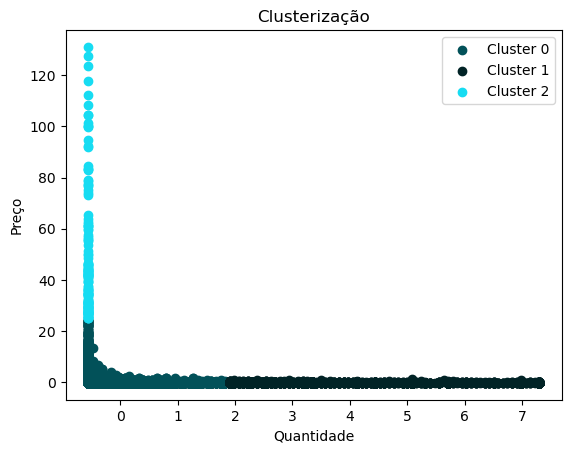

In [ ]:
for i in range(3):
    cluster_df = df_standard[df_standard['rotulos'] == i]
    plt.scatter(cluster_df['Quantity'],cluster_df['UnitPrice'],label=f'Cluster {i}', c=cores[i])
    
plt.legend()
plt.title('Clusterização')
plt.xlabel('Quantidade')
plt.ylabel('Preço')
plt.savefig('clusters_compras.png')

plt.show()

Visualmente a segmentação das compras está bem definida.

In [ ]:
df_standard.pivot_table(index='rotulos', values=['Quantity', 'UnitPrice'], aggfunc='mean')

,Quantity,UnitPrice
rotulos,,
0,-0.161195,-0.009179
1,3.890409,-0.112950
2,-0.554760,49.079520


#### Podemos descrever os 3 grupos de compras assim: 

- Grupo 0: Este grupo possui uma quantidade de -0,160409 e um preço unitário de -0,009247. Ambos os valores estão abaixo da média, sugerindo que este grupo pode representar um segmento de clientes com compras de baixa quantidade e baixo valor unitário.

- Grupo 1: Este grupo possui uma quantidade de -0,552358 e um preço unitário de 48,975793. Embora a quantidade esteja abaixo da média, o valor unitário é significativamente maior do que os outros grupos, indicando que este grupo pode representar um segmento de clientes com compras de baixa quantidade, mas de alto valor unitário.

- Grupo 2: Este grupo possui uma quantidade de 3,906260 e um preço unitário de -0,112852. Ambos os valores estão acima da média, sugerindo que este grupo pode representar um segmento de clientes com compras de alta quantidade e baixo valor unitário.


In [ ]:
# Salvando rotulos no df para possibilitar a comparação de itens do df original com os clusters.
df['rotulos']=rotulos

In [ ]:
# Pivot table comparando lucros com grupos
df.pivot_table(index='rotulos', values='TotalValue', aggfunc=['mean', 'count'])

,mean,count
,TotalValue,TotalValue
rotulos,,
0,13.354473,499177
1,86.752248,20703
2,996.755887,141


Grupo com maior renda gerada é o 2. A equipe de marketing pode tentar encontrar uma oportunidade em direcionar mais o marketing a compradores de poucos itens com o valor mais elevado, ao invés de compra em atacado, ou tentar chamar atenção de um novo perfil que compre vários itens de alto custo.

## Entendendo como o número de pedidos se relaciona com o tempo

In [ ]:
from pandas.api.types import CategoricalDtype


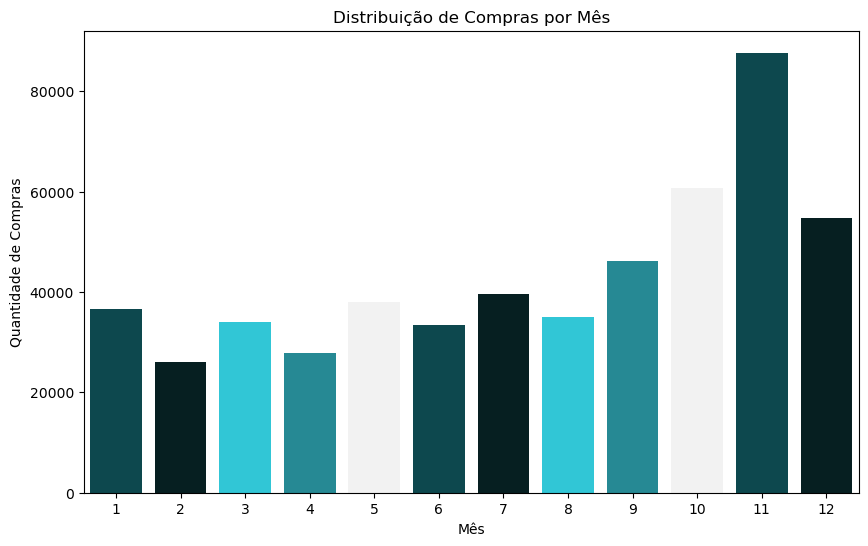

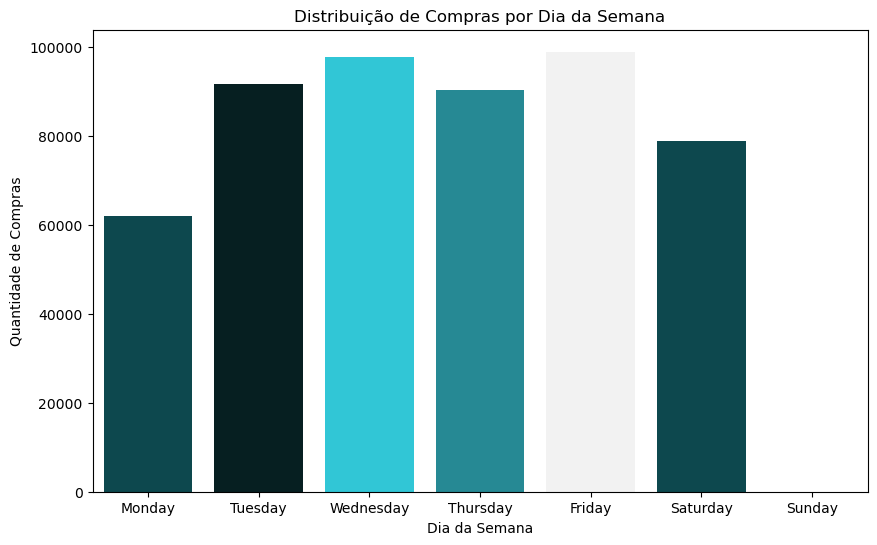

In [ ]:

dias_da_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordem_dias_da_semana = CategoricalDtype(categories=dias_da_semana, ordered=True)

df['Mês'] = df['InvoiceDate'].dt.month
df_grouped = df.groupby('Mês')['Quantity'].count().reset_index()

# Criando o gráfico de barras com a distribuição de quantidade de itens por mês

plt.figure(figsize=(10, 6))

sns.barplot(data=df_grouped, x='Mês', y='Quantity', palette=['#025159', '#012326', '#16DCF2', '#1497A6', '#F2F2F2'])
plt.xlabel('Mês')
plt.ylabel('Quantidade de Compras')
plt.title('Distribuição de Compras por Mês')
plt.savefig('compras_mes.png')
plt.show()
df['day_of_week'] = df['InvoiceDate'].dt.day_name().astype(ordem_dias_da_semana)

# Agrupando os dados por dia da semana e calcular a soma da coluna 'Quantity' para cada grupo
df_grouped = df.groupby('day_of_week')['Quantity'].count().reset_index()

# Criando o gráfico de barras com a distribuição de quantidade de itens por dia da semana
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='day_of_week', y='Quantity', palette=['#025159', '#012326', '#16DCF2', '#1497A6', '#F2F2F2'])
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Compras')
plt.title('Distribuição de Compras por Dia da Semana')
plt.savefig('compras_dia.png')
plt.show()

# Criando Segmentação dos Clientes
### Criando métricas para realizar a clusterização baseadas em RFM (Recência, Frequência e valor Monetário) e no tipo de item da loja.

- Será treinado um modelo de processamento de linguagem natural para classificar os items.

- Será calculado a moda do tipo de item o qual o cliente costuma comprar para rotulá-lo.

- Com base nos dados será calculado em quartis e avaliado o RFM_score de cada cliente.


## Utilizando nlp para formar grupos de tipos de itens.

In [ ]:
# Importando bibliotecas para o NLP.
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Salvando as descrições dos itens em data.
data=df.Description.unique()

In [ ]:
# Carregando dicionário de palavras em inglês. 
nlp=spacy.load("en_core_web_sm")
doc=list(nlp.pipe(data))
 

In [ ]:
vectorizer=CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
# Treinando modelo com as decrições vetorizadas.
doc_term_matrix=vectorizer.fit_transform(doc)

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
lda_model=LatentDirichletAllocation(n_components=4, random_state=42)
lda_model.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=4, random_state=42)

In [ ]:
categories=lda_model.transform(doc_term_matrix).argmax(axis=1)
# Salvando as categorias

In [ ]:
doc_by_cat={}

In [ ]:
# Enumerando grupos por categoria
for i, category in enumerate(categories):
    if category not in doc_by_cat:
        doc_by_cat[category]=[]
    doc_by_cat[category].append(data[i])
    

#### Realizando nomeação de grupos com 200 produtos de cada no ChatGPT recebemos:

- Categoria 0: "Tesouros Vintage e Retrô"

- Categoria 1: "Lar Aconchegante"

- Categoria 2: "Cozinha em Ação"

- Categoria 3: "Magia Natalina e Artesanato"

Esses nomes foram escolhidos com base nas descrições que você forneceu para cada categoria, capturando a essência e o tema central de cada uma delas de forma adequada.





In [ ]:
df['Tipo_Item']=df['Description'].map(doc_by_cat)

In [ ]:
def map_type(description):
    if description in doc_by_cat:
        return doc_by_cat[category]
    return ''
df['Tipo_Item']=df['Description'].apply(map_type)

In [ ]:
# Retornando chave do grupo com função.
def tipo_item(row):
    return [chave for chave, valores in doc_by_cat.items() if row in valores][0]

In [ ]:
df['Tipo_Item']=df['Description'].apply(tipo_item)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Month,TotalValue,rotulos,Mês,day_of_week,Tipo_Item
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,11,15.30,0,11,Thursday,3
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,11,20.34,0,11,Thursday,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,11,22.00,0,11,Thursday,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,11,20.34,0,11,Thursday,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,11,20.34,0,11,Thursday,3


Esse tipo de análise é importante pois pode promover determinados tipos de itens em determinadas épocas do ano. Dando um pouco mais de atenção a Categoria 3: "Magia Natalina e Artesanato" durante o natal.

### Calculando métricas RFM para os clientes

Em resumo, a análise RFM é uma ferramenta importante para estudar os clientes, permitindo que as empresas identifiquem os clientes mais valiosos, personalizem suas estratégias de marketing, otimizem seus recursos e tomem decisões informadas para impulsionar o crescimento dos negócios.






In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculando a Recência como a diferença entre a data mais recente na base de dados e a data de cada transação
data_referencia = df['InvoiceDate'].max() + pd.DateOffset(days=1)
df['Recencia'] = (data_referencia - df['InvoiceDate']).dt.days

In [ ]:
# Calculando a Frequência como o número de transações realizadas por cada cliente
df_rfm = df.groupby('CustomerID').agg({'Recencia': 'min', 'InvoiceNo': 'nunique', 'TotalValue': 'sum'})

# Renomenado as colunas para os nomes adequados
df_rfm.rename(columns={'InvoiceNo': 'Frequencia', 'TotalValue': 'ValorMonetario'}, inplace=True)

In [ ]:
# Calculando as pontuações RFM com base em segmentos ou quartis
df_rfm['R'] = pd.qcut(df_rfm['Recencia'], q=4, labels=False, duplicates='drop')
df_rfm['F'] = pd.qcut(df_rfm['Frequencia'], q=4, labels=False, duplicates='drop')
df_rfm['M'] = pd.qcut(df_rfm['ValorMonetario'], q=4, labels=False, duplicates='drop')

# Calculando a pontuação RFM total somando as pontuações R, F e M
df_rfm['RFM_Total'] = df_rfm['R'] + df_rfm['F'] + df_rfm['M']

# Exiba o DataFrame com as pontuações RFM e os segmentos
print(df_rfm.head())

            Recencia  Frequencia  ValorMonetario  R  F  M  RFM_Total
CustomerID                                                          
12347.0            2           7         4060.40  0  2  3          5
12348.0           75           4         1195.08  2  1  2          5
12349.0           19           1         1757.55  1  0  3          4
12350.0          310           1          334.40  3  0  1          4
12352.0           36           8         2506.04  1  2  3          6


In [ ]:
df_rfm=df_rfm.reset_index()

In [ ]:
# Salvando moda do tipo do item
df_moda_tipo_item = df.groupby('CustomerID')['Tipo_Item'].apply(lambda x: x.mode()[0]).reset_index()


In [ ]:
# Salvando a moda
df_rfm=pd.merge(df_rfm, df_moda_tipo_item, on='CustomerID', how='inner')

In [ ]:
# Criando colunas para variáveis binárias
df_dummies=pd.get_dummies(df_rfm['Tipo_Item'])

# Concatenando as colunas one-hot no DataFrame original
df_rfm = pd.concat([df_rfm, df_dummies], axis=1)

In [ ]:
df_rfm.head()

,CustomerID,Recencia,Frequencia,ValorMonetario,R,F,M,RFM_Total,Tipo_Item,0,1,2,3
0,12347.0,2,7,4060.40,0,2,3,5,1,0,1,0,0
1,12348.0,75,4,1195.08,2,1,2,5,1,0,1,0,0
2,12349.0,19,1,1757.55,1,0,3,4,2,0,0,1,0
3,12350.0,310,1,334.40,3,0,1,4,2,0,0,1,0
4,12352.0,36,8,2506.04,1,2,3,6,2,0,0,1,0


In [ ]:
df_rfm=df_rfm.rename(columns= {0:'0',1: '1',
    2: '2',
    3: '3'})

## Montando modelo com colunas de RFM e tipo de item.

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\clust

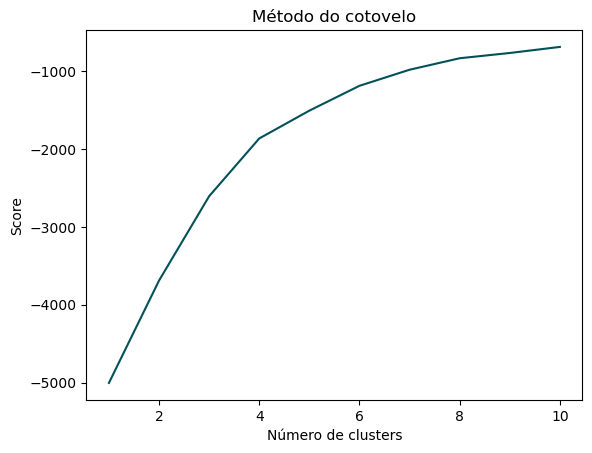

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Criando uma instância do MinMaxScaler
scaler = MinMaxScaler()
# Normalizando dados
df_rfm[['R', 'F', 'M']] = scaler.fit_transform(df_rfm[['R', 'F', 'M']])
max_clusters = 10
kmeans = [KMeans(n_clusters=i) for i in range(1, max_clusters+1)]
# Treinando
score = [kmeans[i].fit(df_rfm[['R', 'F', 'M', '0','1','2','3']]).score(df_rfm[['R', 'F', 'M', '0','1','2','3']]) for i in range(len(kmeans))]
plt.plot(range(1, max_clusters+1), score)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.show()

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\clust

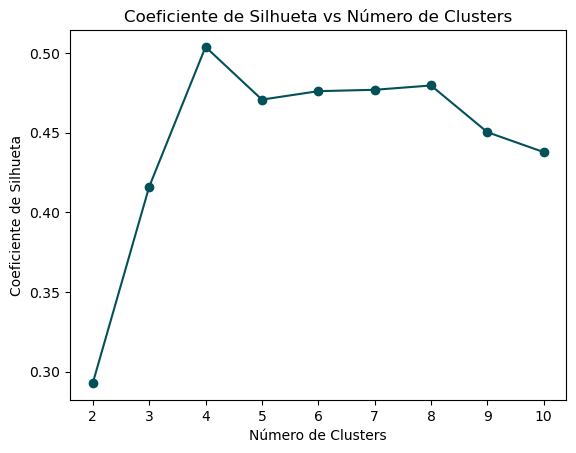

In [ ]:
silhouette_scores = []

for n_clusters in range(2, 11):
    # Iniciando
    kmeans = KMeans(n_clusters=n_clusters)
    # Ajustando
    kmeans.fit(df_rfm[['R', 'F', 'M', '0', '1', '2', '3']])
    labels = kmeans.labels_
    # Calculando
    silhouette_avg = silhouette_score(df_rfm[['R', 'F', 'M', '0', '1', '2', '3']], labels)
    silhouette_scores.append(silhouette_avg)

# Plotando o gráfico de coeficiente de silhueta versus número de clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Coeficiente de Silhueta vs Número de Clusters')
plt.show()

Utilizando número de clusters = 4 baseado nos testes.

In [ ]:
# Selecionar as colunas relevantes para o modelo
df_rfm_cluster = df_rfm[['R', 'F', 'M', '0', '1', '2', '3']]


In [ ]:
# Iniciando o modelo de K-means
kmeans = KMeans(n_clusters=4, random_state=42) 

# Treinando
kmeans.fit(df_rfm_cluster)

# Obtendo rótulos
df_rfm_cluster['Cluster'] = kmeans.labels_

# Exibindo os resultados do modelo
print(df_rfm_cluster.head(10))

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


          R    F         M  0  1  2  3  Cluster
0  0.000000  1.0  1.000000  0  1  0  0        0
1  0.666667  0.5  0.666667  0  1  0  0        0
2  0.333333  0.0  1.000000  0  0  1  0        3
3  1.000000  0.0  0.333333  0  0  1  0        3
4  0.333333  1.0  1.000000  0  0  1  0        3
5  1.000000  0.0  0.000000  0  1  0  0        0
6  1.000000  0.0  0.666667  0  1  0  0        0
7  1.000000  0.0  0.333333  0  0  0  1        2
8  0.333333  0.5  1.000000  0  0  1  0        3
9  0.333333  0.0  1.000000  0  1  0  0        0


C:\Users\gabri\AppData\Local\Temp\ipykernel_10532\3019926800.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_cluster['Cluster'] = kmeans.labels_


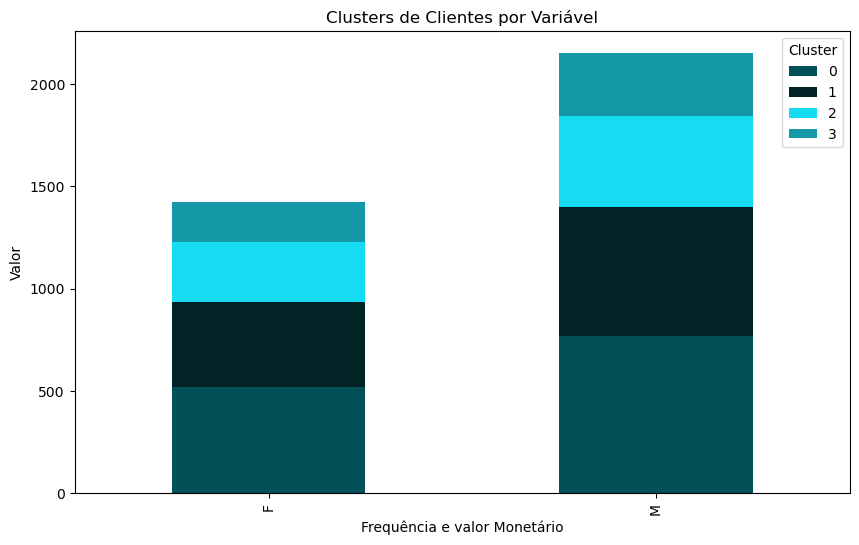

In [ ]:
# Calculando a contagem por frequência e valor monetário.
count_df = df_rfm_cluster.groupby(['Cluster']).agg({'F': 'sum', 'M': 'sum'})

# Transpondo o DataFrame para ter os clusters como índices e as variáveis como colunas
count_df = count_df.T

# Criando o gráfico de barras empilhadas
count_df.plot(kind='bar', color=cores, stacked=True, figsize=(10, 6))

# Exibindo o gráfico
plt.xlabel('Frequência e valor Monetário')
plt.ylabel('Valor')
plt.title('Clusters de Clientes por Variável')
plt.legend(title='Cluster')
plt.savefig('valor_clusters.png')
plt.show()

Valor proporcional a população.

In [ ]:
# Estudando os clusters
df_rfm_cluster.pivot_table(index='Cluster', values=['R', 'F', 'M', '0', '1', '2', '3'], aggfunc='mean')

,0,1,2,3,F,M,R
Cluster,,,,,,,
0,0,1,0,0,0.363066,0.534959,0.450639
1,1,0,0,0,0.310022,0.472700,0.528297
2,0,0,0,1,0.325388,0.495565,0.508869
3,0,0,1,0,0.306041,0.484367,0.509804


Podemos observar que o cluster 0 tende a gerar mais valor monetário e também possuem maior frequência de compra.
Esses clientes adoram comprar da categoria Lar Aconchegante, é uma boa aposta para a Everything plus dar uma olhada em como esses clientes geram lucro e o que podem fazer para os outros grupos alcançarem um número parecido.

In [ ]:
# Salvando no df rfm original
df_rfm['Cluster'] = df_rfm_cluster['Cluster']


In [ ]:
# Calculando média dos fatores FMR
df_rfm.pivot_table(index='Cluster', values=['R', 'F', 'M', 'RFM_Total'], aggfunc='mean')

,F,M,R,RFM_Total
Cluster,,,,
0,0.363066,0.534959,0.450639,3.682927
1,0.310022,0.472700,0.528297,3.623037
2,0.325388,0.495565,0.508869,3.664080
3,0.306041,0.484367,0.509804,3.594595


Para o Cluster 0 obtemos um valor monetário maior e frequência também. Provavelmente são clientes que são adeptos e tem hábito de comprar na Everything Plus.
Podemos utilizar essa análise, por exemplo, para focar o marketing nos clientes onde o foco dos itens comprados são da categoria natalina. (Cluster 2)

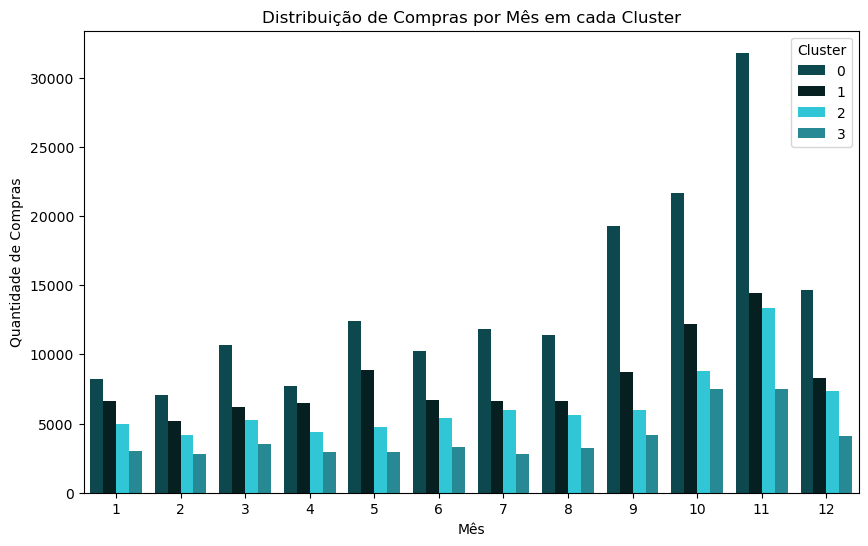

In [ ]:
# Combinando os dataframes df e df_rfm_cluster com base na coluna 'CustomerID'
df_combined = df.merge(df_rfm, on='CustomerID')

# Filtrar o dataframe combinado com base nos rótulos de clusters do df_rfm_clusters
df_filtered = df_combined[df_combined['Cluster'].isin([0, 1, 2, 3])]
df_grouped = df_filtered.groupby(['Cluster', 'Mês'])['Quantity'].count().reset_index()

# Criar o gráfico de barras com a distribuição de quantidade de itens por mês em cada cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='Mês', y='Quantity', hue='Cluster')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Compras')
plt.title('Distribuição de Compras por Mês em cada Cluster')
plt.savefig('users_mes_clusters.png')
plt.show()

É perceptível que no mês 11 o único cluster a não aumentar o número de vendas é o 3, referente a venda de utensílios de cozinha. Uma recomendação para everything plus seria aumentar o número de itens de cozinha tematizados para época, como pratos natalinos.

Podemos observar também uma disparada dos grupos 0 e 2, referentes a Casa aconchegante e Artesanato/ Natal. É presumível que podem ter aumentado de maneira desproporcional aos outros por serem boas opções de presentes e para decorar a casa.

## Analisando por segmento

In [ ]:
# Definindo os segmentos de RFM com base nas pontuações
segmentos_rfm = {
    'Melhor': (df_rfm['RFM_Total'] >= 7).map({True: 'Sim', False: 'Não'}),
    'Alto valor': (df_rfm['M'] == 1).map({True: 'Sim', False: 'Não'}),
    'Alta frequência': (df_rfm['F'] >= 0.5).map({True: 'Sim', False: 'Não'}),
    'Inativo': (df_rfm['R'] == 1).map({True: 'Sim', False: 'Não'})}
for segmento, condicao in segmentos_rfm.items():
    df_rfm[segmento] = condicao

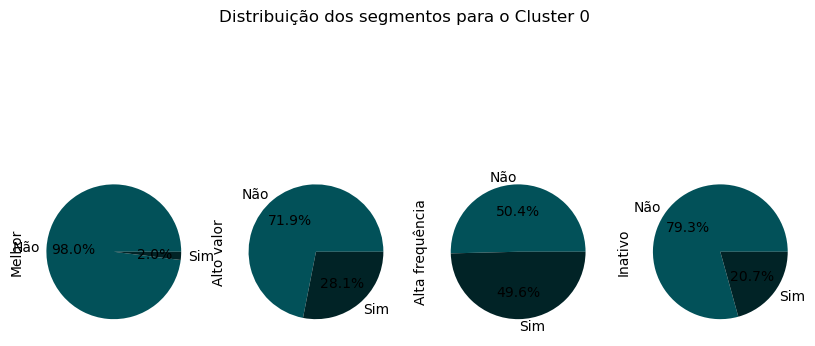

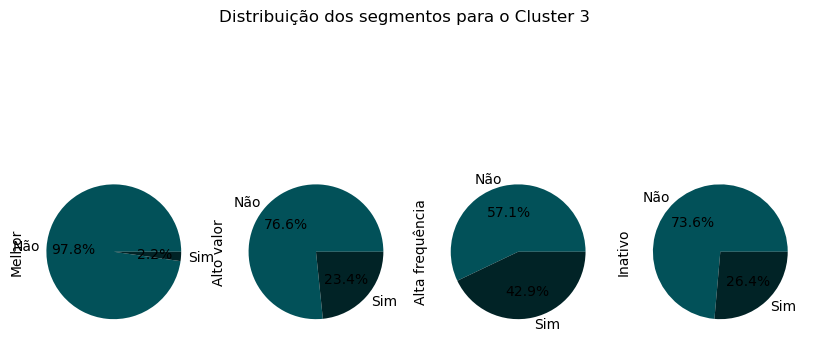

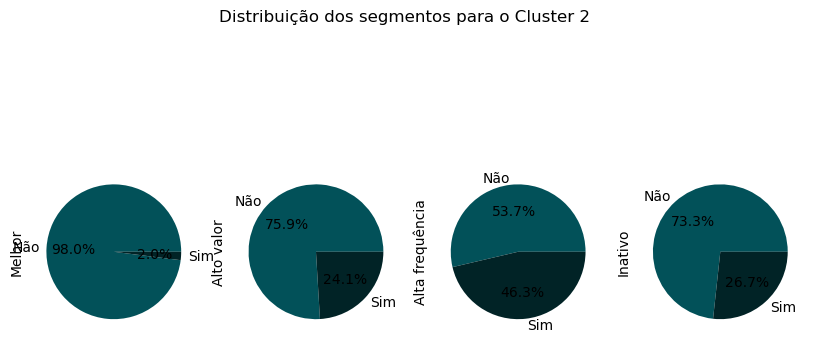

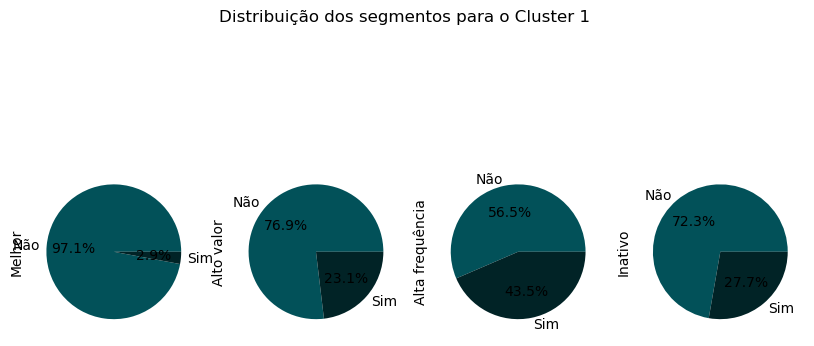

In [ ]:

# Plotando gráfico de pizza para cada cluster
for cluster in df_rfm['Cluster'].unique():
    cluster_counts = df_rfm[df_rfm['Cluster'] == cluster].loc[:, 'Melhor':'Inativo'].apply(pd.Series.value_counts)
    cluster_counts.plot(kind='pie', subplots=True, figsize=(10, 5), legend=False, autopct='%1.1f%%')
    plt.suptitle(f'Distribuição dos segmentos para o Cluster {cluster}')
    plt.show()

Os indicadores RFM indicam que para um maior valor monetário, recência e atividade a Everything plus:
- Deve buscar incentivar uma maior adesão de clientes do grupo 0.

# Conclusão
Com esses resultados, é possível entender melhor os perfis dos clientes e promover certos tipos de itens em determinadas épocas do ano. É importante continuar analisando os dados e buscando maneiras de melhorar a experiência do cliente na loja online.

## Potencializar Everything Plus com personalização de marketing para cada perfil e tipo de compra

Com base nos resultados obtidos algumas melhorias podem ser implementadas depedendo do que a Everything deseja.

Como por exemplo:

- Personalizar o Marketing no natal principalmente para os clientes do grupo 2, os quais já usualmente compram itens do tipo.

- Incentivar a compra de itens mais caros, mesmo que isoladamente costuma trazar mais lucro para empresa em comparação com vários itens baratos em atacado.

- Realizar uma análise mais profunda dos clientes que compram itens da categoria Lar aconchegante e entender por que geram mais renda para conseguir assim aplicar nos outros grupos.

- Aumentar o número de itens de cozinha tematizados para época, como pratos natalinos para aumentar o número de vendas do grupo 3 também próximo ao fim do ano.


Os indicadores RFM indicam que para um maior valor monetário, recência e atividade a Everything plus:

- Deve buscar incentivar uma maior adesão de clientes do grupo 0.